<a href="https://colab.research.google.com/github/NikitaFinogenov/LinearBinaryclassification/blob/main/BINClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Реализация бинарной классификации

Источники:

https://proproprogs.ru/ml/ml-reshenie-prostoy-zadachi-binarnoy-klassifikacii

https://habr.com/ru/articles/714994/

In [699]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считывание и визуализация данных:

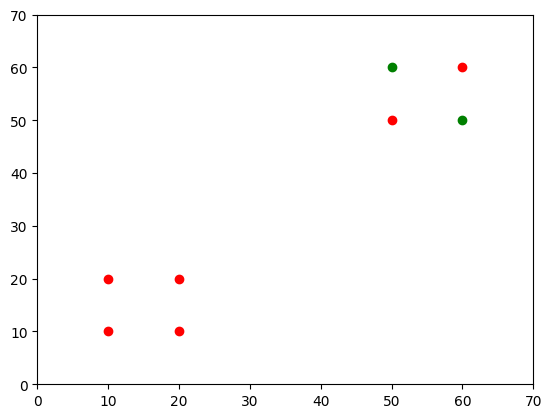

In [700]:
'''
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35], [40,70], [10, 10], [15, 15]])
y_train = np.array([-1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1])
'''
x_train = np.array([[10, 10], [10, 20], [20, 20], [20, 10], [50, 50], [50, 60], [60, 60], [60, 50]])
y_train = np.array([-1, -1, -1, -1, -1, 1, -1, 1])



plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == -1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == -1], marker='o', color='red')
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == 1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == 1], marker='o', color='green')
plt.xlim(0, max(x_train[:, 0])+10)
plt.ylim(0, max(x_train[:, 1])+10)
plt.show()

In [701]:
def count(x: np.array, c):
  cnt = 0
  for i in x:
    if i == c: cnt += 1
  return cnt

def dist(index, index2, label):
  sum = 0
  for i in range(len(x_train)):
    if y_train[i] == label:
      sum += np.sqrt((x_train[i][0]-index)**2 + (x_train[i][1]-index2)**2)
      #print(sum)
  #print(sum/count(y_train, label))
  return sum/count(y_train, label)

In [702]:
print(dist(10, 10, 1))

64.03124237432849


In [703]:
dist0_massive = []
dist1_massive = []
dist_equel_massive = []
for index in range(min(x_train[:,0])-10, max(x_train[:, 0]) + 10):
  for index2 in range(min(x_train[:,1])-10, max(x_train[:, 1]) + 10):

    dist_0 = dist(index, index2, 1)
    dist_1 = dist(index, index2, -1)

    if dist_0 > dist_1: dist0_massive.append([index,index2])
    if dist_0 < dist_1: dist1_massive.append([index,index2])
    if dist_0 == dist_1: dist_equel_massive.append([index,index2])

In [704]:
min_x = min(x_train[:,0])-10
point0 = []
for i in dist1_massive:
  if i[0] != min_x:
    min_x = i[0]
    point0.append(i)

In [705]:
print(len(dist0_massive),dist0_massive)
print(len(dist1_massive),dist1_massive)
print(dist_equel_massive)
print(len(point0) ,point0)

2524 [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], [0, 25], [0, 26], [0, 27], [0, 28], [0, 29], [0, 30], [0, 31], [0, 32], [0, 33], [0, 34], [0, 35], [0, 36], [0, 37], [0, 38], [0, 39], [0, 40], [0, 41], [0, 42], [0, 43], [0, 44], [0, 45], [0, 46], [0, 47], [0, 48], [0, 49], [0, 50], [0, 51], [0, 52], [0, 53], [0, 54], [0, 55], [0, 56], [0, 57], [0, 58], [0, 59], [0, 60], [0, 61], [0, 62], [0, 63], [0, 64], [0, 65], [0, 66], [0, 67], [0, 68], [0, 69], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [1, 11], [1, 12], [1, 13], [1, 14], [1, 15], [1, 16], [1, 17], [1, 18], [1, 19], [1, 20], [1, 21], [1, 22], [1, 23], [1, 24], [1, 25], [1, 26], [1, 27], [1, 28], [1, 29], [1, 30], [1, 31], [1, 32], [1, 33], [1, 34], [1, 35], [1, 36], [1, 37], [1, 38], [1, 39], [1, 40], [1, 41], [1, 42

In [706]:
def clear_points(point0: list):
  ToDel = []
  loc_i = 0
  for i in range(len(point0)-1):
    if point0[i][1] == min(x_train[:,1])-10 and point0[i+1][1] == min(x_train[:,1])-10:
      #print(point0[i], i)
      ToDel.append(point0[i])
      loc_i += 1
  ToDel.append(point0[i+1])
  return ToDel

In [707]:
print(clear_points(point0))
ToDel = clear_points(point0)
for i in range(0,len(ToDel)):
  print(ToDel[i])
  point0.remove(ToDel[i])
print(point0)

[[69, 1]]
[69, 1]
[[1, 69], [2, 68], [3, 67], [4, 66], [5, 65], [6, 64], [7, 63], [8, 62], [9, 61], [10, 60], [11, 59], [12, 58], [13, 57], [14, 56], [15, 56], [16, 55], [17, 54], [18, 53], [19, 52], [20, 51], [21, 50], [22, 49], [23, 48], [24, 47], [25, 46], [26, 45], [27, 44], [28, 43], [29, 42], [30, 41], [31, 40], [32, 39], [33, 38], [34, 37], [35, 36], [36, 35], [37, 34], [38, 33], [39, 32], [40, 31], [41, 30], [42, 29], [43, 28], [44, 27], [45, 26], [46, 25], [47, 24], [48, 23], [49, 22], [50, 21], [51, 20], [52, 19], [53, 18], [54, 17], [55, 16], [56, 14], [57, 13], [58, 12], [59, 11], [60, 10], [61, 9], [62, 8], [63, 7], [64, 6], [65, 5], [66, 4], [67, 3], [68, 2]]


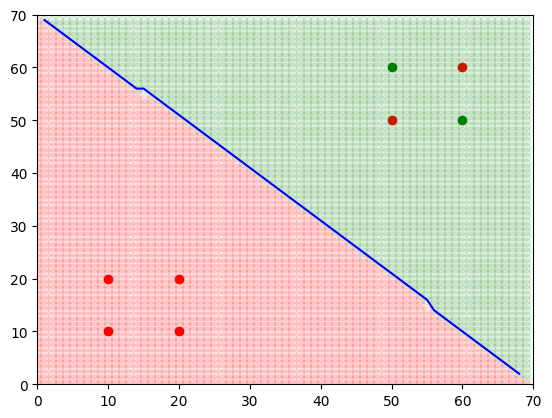

In [708]:
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == -1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == -1], marker='o', color='red')
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == 1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == 1], marker='o', color='green')
plt.scatter([i[0] for i in dist1_massive], [i[1] for i in dist1_massive], marker='o', color='green', alpha=0.1)
plt.scatter([i[0] for i in dist0_massive], [i[1] for i in dist0_massive], marker='o', color='red', alpha=0.1)
plt.plot([i[0] for i in point0], [i[1] for i in point0], color='blue')
plt.xlim(min(x_train[:,0])-10, max(x_train[:, 0])+10)
plt.ylim(min(x_train[:,1])-10, max(x_train[:, 1])+10)
plt.show()

Апроксимация полученных точек до прямой

In [709]:
x, y = np.array([i[0] for i in point0]), np.array([i[1] for i in point0])
n = len(x)

x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

m = numerator / denominator
b = y_mean - m * x_mean

x_ex_min = ((min(x_train[:,1])-10)-b)/m
x_ex_max = ((max(x_train[:,1])+10)-b)/m

X = [x_ex_min, x_ex_max]
Y = [min(x_train[:,1])-10, max(x_train[:,1])+10]

print(f"x: {x}, y: {y}")
print(f"x_min: {x_ex_min}, x_max: {x_ex_max}")
print(f"Угловой коэффициент (m): {m}")
print(f"Свободный член (b): {b}")

x: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68], y: [69 68 67 66 65 64 63 62 61 60 59 58 57 56 56 55 54 53 52 51 50 49 48 47
 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23
 22 21 20 19 18 17 16 14 13 12 11 10  9  8  7  6  5  4  3  2]
x_min: 70.63121502110671, x_max: 0.5763948579833141
Угловой коэффициент (m): -0.9992174676489676
Свободный член (b): 70.57594381035997


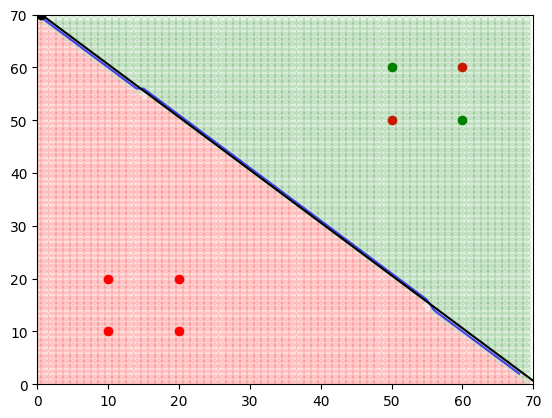

In [710]:
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == -1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == -1], marker='o', color='red')
plt.scatter([x_train[i][0] for i in range(len(x_train)) if y_train[i] == 1], [x_train[i][1] for i in range(len(x_train)) if y_train[i] == 1], marker='o', color='green')
plt.scatter([i[0] for i in dist1_massive], [i[1] for i in dist1_massive], marker='o', color='green', alpha=0.1)
plt.scatter([i[0] for i in dist0_massive], [i[1] for i in dist0_massive], marker='o', color='red', alpha=0.1)
plt.plot([i[0] for i in point0], [i[1] for i in point0], color='blue', alpha=0.7)
#plt.plot(x, m*x + b, color='black')
plt.plot(X, Y, color='black')
plt.scatter(X, Y, marker='o', color='black', alpha=1)
plt.xlim(min(x_train[:,0])-10, max(x_train[:, 0])+10)
plt.ylim(min(x_train[:,1])-10, max(x_train[:, 1])+10)
plt.show()